# Unsupervised Learning: Trade&Ahead

**Marks: 60**

## Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


## Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist, cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

## Data Overview

In [2]:
# loading the dataset
data = pd.read_csv("stock_data.csv")

<IPython.core.display.Javascript object>

In [3]:
data.shape

(340, 15)

<IPython.core.display.Javascript object>

* There are 340 rows and 15 columns in the data.

In [4]:
# viewing a random sample of the dataset
data.sample(n=10, random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620


<IPython.core.display.Javascript object>

In [5]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

<IPython.core.display.Javascript object>

In [6]:
# let's look at the structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

<IPython.core.display.Javascript object>

* There are 4 object variables and 11 numerical variables in the data.
* There are a total of 15 columns and 340 observations in the dataset.

In [7]:
# fixing column names
df.columns = [c.replace(" ", "_") for c in df.columns]

<IPython.core.display.Javascript object>

In [8]:
# let's check for duplicate observations
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

* There are no duplicate values in the data.

In [9]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker_Symbol,340,340,MMC,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,Teradata Corp.,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS_Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS_Sub_Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current_Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price_Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash_Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net_Cash_Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


<IPython.core.display.Javascript object>

* The data has observations about 340 unique companies.
* There are 5 unique economic sectors and the data has more observations on Industrial sector with 53 observations.
* There are 104 unique Sub_Industry and the top being Oil & Gas Exploration & Production.
* 75% of the stocks have price less than 100 dollars with an average price of 80 dollars.
* The average price change is ~4% and the maximum price change is 55% approximately.
* The average volatility is 1.5 and the maximum volatility is 4.6.
* The average ROE is ~40 and the maximum ROE is 917.
* The average Cash ratio is 70 and the maximum cash ratio is 958.
* The average value of net cash flow is ~5.5e7 and the maximum value is 2.1e10.
* The average value of net income is 1.5e9 and the maximum value is 2.4e10. The net income of 50% of the companies is less than the average net income.
* The average value of earnings per share is 2.77 and the maximum value is 50.09.
* The Estimated_Shares_Outstanding has an average valueof 5.8e8 dollars and maximum value of 6.2e9 dollars.
* The average value of P/E Ratio is 32.6 and the maximum value is 528.03. 75% of the companies have P/E ratio of less than 32.
* The average value of P/B ratio is -1.7 and the maximum value is 129.1.

In [10]:
# checking missing values
df.isna().sum()

Ticker_Symbol                   0
Security                        0
GICS_Sector                     0
GICS_Sub_Industry               0
Current_Price                   0
Price_Change                    0
Volatility                      0
ROE                             0
Cash_Ratio                      0
Net_Cash_Flow                   0
Net_Income                      0
Earnings_Per_Share              0
Estimated_Shares_Outstanding    0
P/E_Ratio                       0
P/B_Ratio                       0
dtype: int64

<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA)

### Univariate Analysis

In [11]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

#### Current_Price 

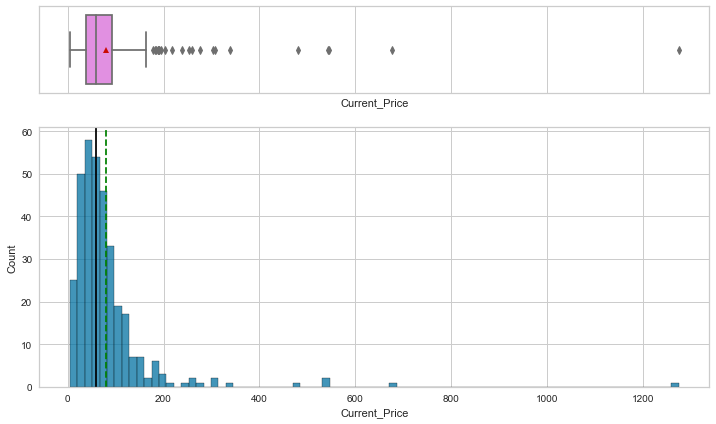

<IPython.core.display.Javascript object>

In [12]:
histogram_boxplot(df, "Current_Price")

* The distribution of the current price is right skewed.
* There are few upper outliers in the data.

#### Price_Change

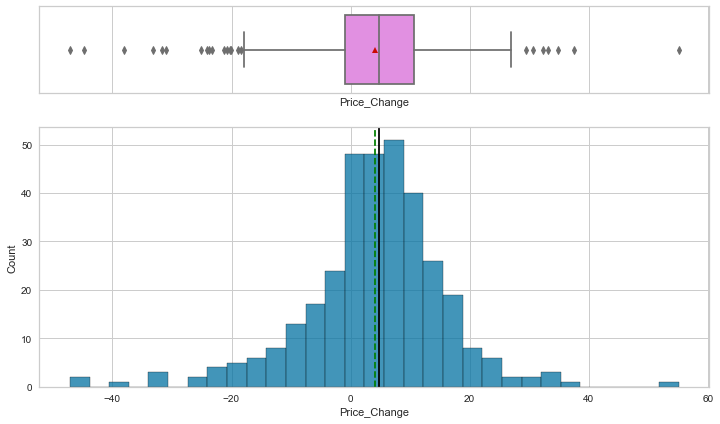

<IPython.core.display.Javascript object>

In [13]:
histogram_boxplot(df, "Price_Change")

* The distribution of price change is almost a normal distribution with few upper and lower outliers.

#### Volatility

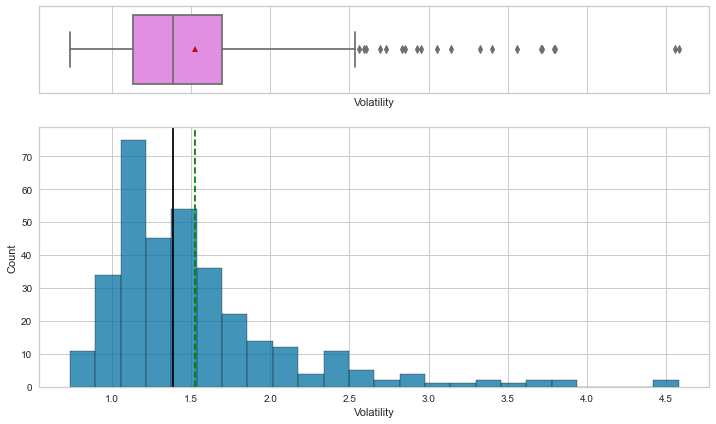

<IPython.core.display.Javascript object>

In [14]:
histogram_boxplot(df, "Volatility")

* The distribution of volatility is right skewed.
* There are few upper outliers in the data.

#### ROE

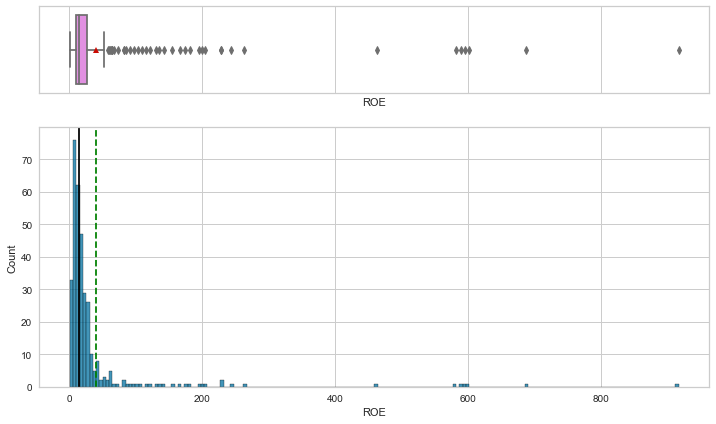

<IPython.core.display.Javascript object>

In [15]:
histogram_boxplot(df, "ROE")

* The distribution of ROE is highly right skewed.
* There are many outliers and few extreme values.

#### Cash_Ratio

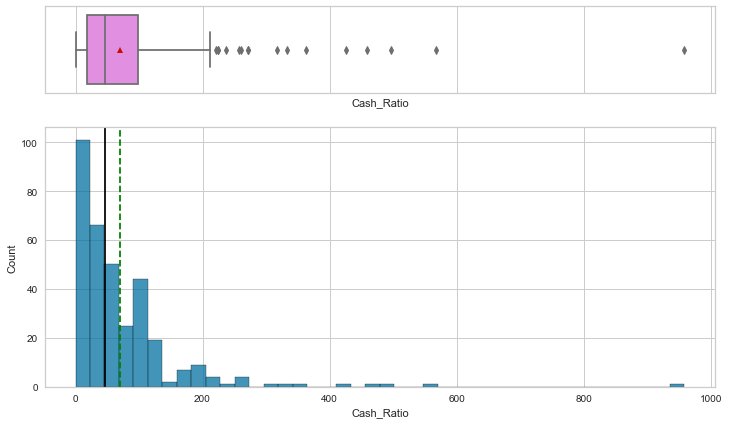

<IPython.core.display.Javascript object>

In [16]:
histogram_boxplot(df, "Cash_Ratio")

* The distribution of cash ratio is right skewed.
* There are few upper outliers in the data.

#### Net_Cash_Flow

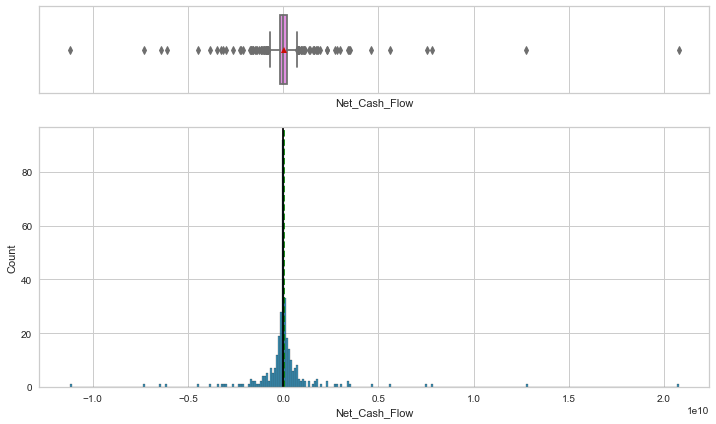

<IPython.core.display.Javascript object>

In [17]:
histogram_boxplot(df, "Net_Cash_Flow")

.* There are many lower and upper outliers in the distribution of net cash flow.

#### Net_Income

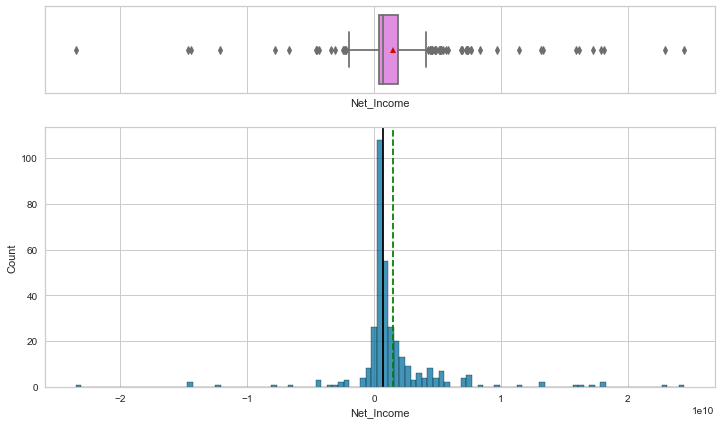

<IPython.core.display.Javascript object>

In [18]:
histogram_boxplot(df, "Net_Income")

* There are few lower and upper outliers in the distribution of net income.

#### Earnings_Per_Share

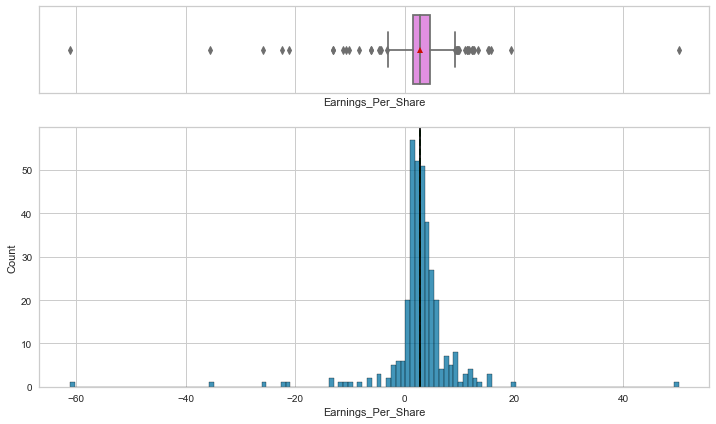

<IPython.core.display.Javascript object>

In [19]:
histogram_boxplot(df, "Earnings_Per_Share")

* There are few lower and upper outliers in the distribution of Earnings per share.

#### Estimated_Shares_Outstanding

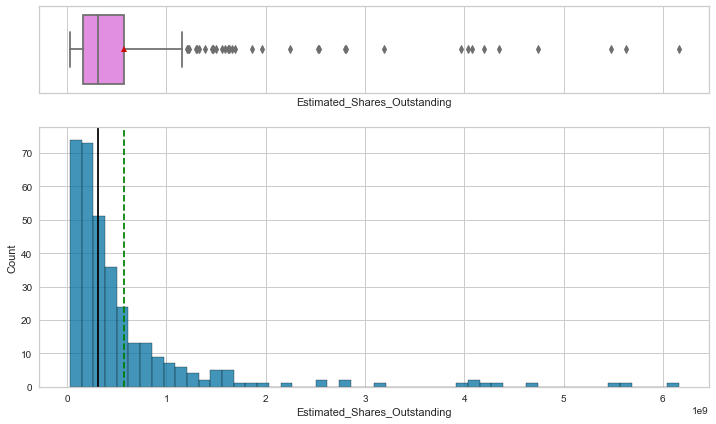

<IPython.core.display.Javascript object>

In [20]:
histogram_boxplot(df, "Estimated_Shares_Outstanding")

* The distribution of Estimated shares outstanding is highly right skewd with many upper outliers.

#### P/E_Ratio

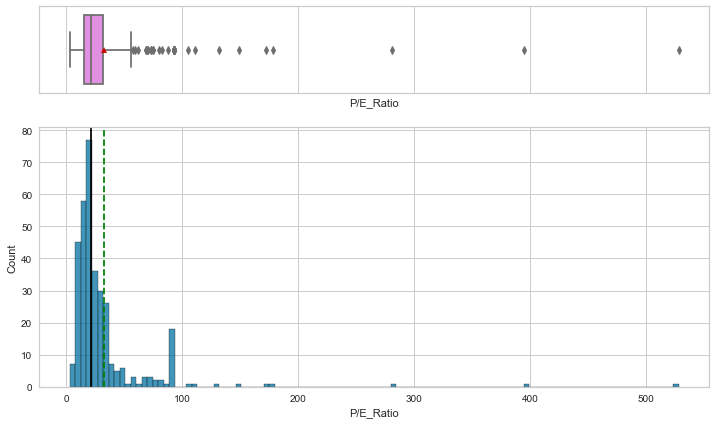

<IPython.core.display.Javascript object>

In [21]:
histogram_boxplot(df, "P/E_Ratio")

* The distribution of P/E ratio is highly right skewed with few upper outliers.

#### P/B_Ratio

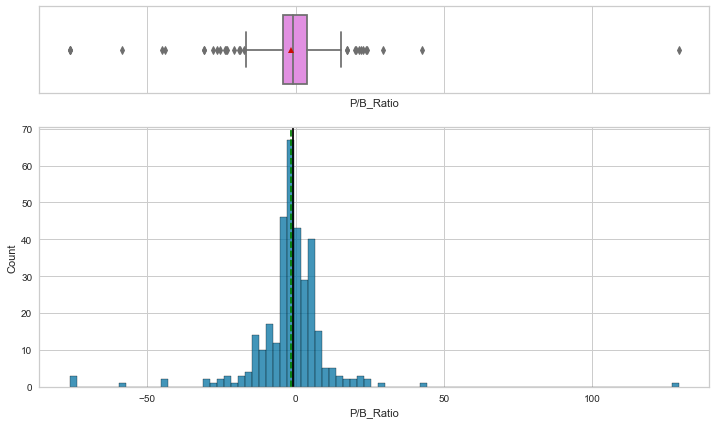

<IPython.core.display.Javascript object>

In [22]:
histogram_boxplot(df, "P/B_Ratio")

* The distribution of P/B ratio is almost normal with few upper nd lower outliers.

In [23]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

#### GICS_Sector

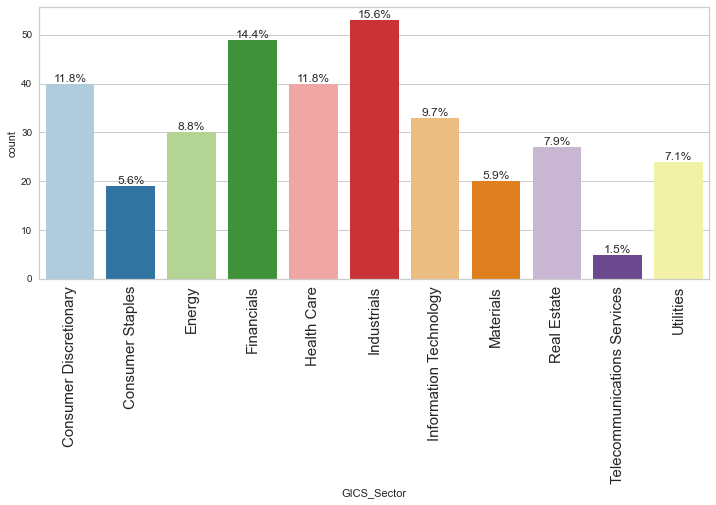

<IPython.core.display.Javascript object>

In [24]:
labeled_barplot(df, "GICS_Sector", perc=True)

* Industrials sector has the most number of stocks followed by Financials sector.
* Telecommunications services sector has the least number of stocks.

#### GICS_Sub_Industry

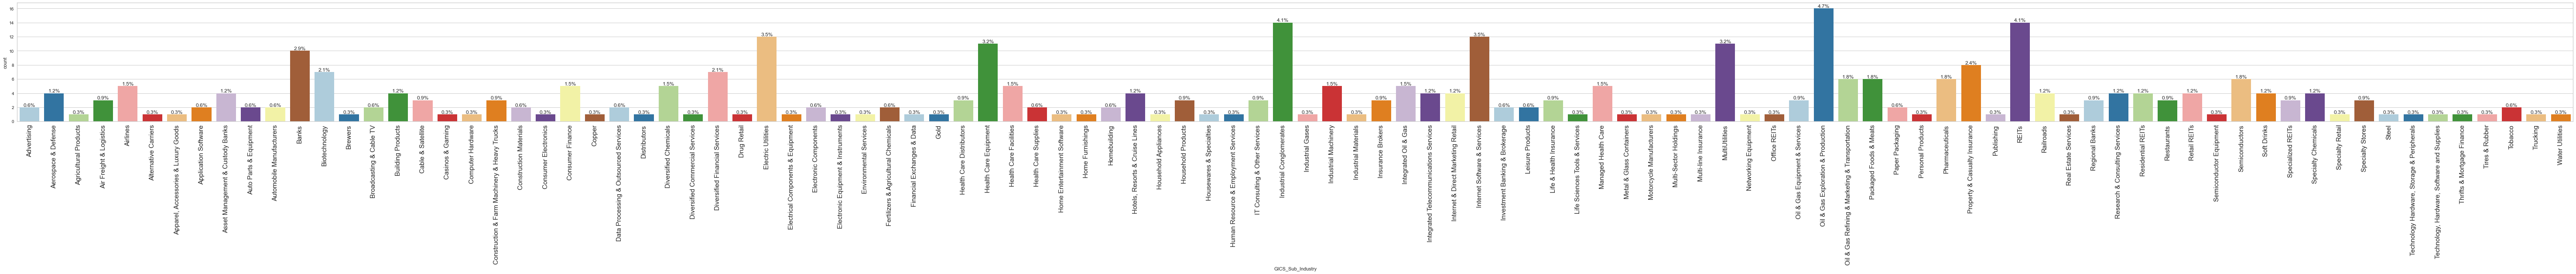

<IPython.core.display.Javascript object>

In [25]:
labeled_barplot(df, "GICS_Sub_Industry", perc=True)

* Oil & Gas exploration & production sub-industry has the more number of stocks followed by REITs and Industrial Conglomerates.

### Bivariate Analysis

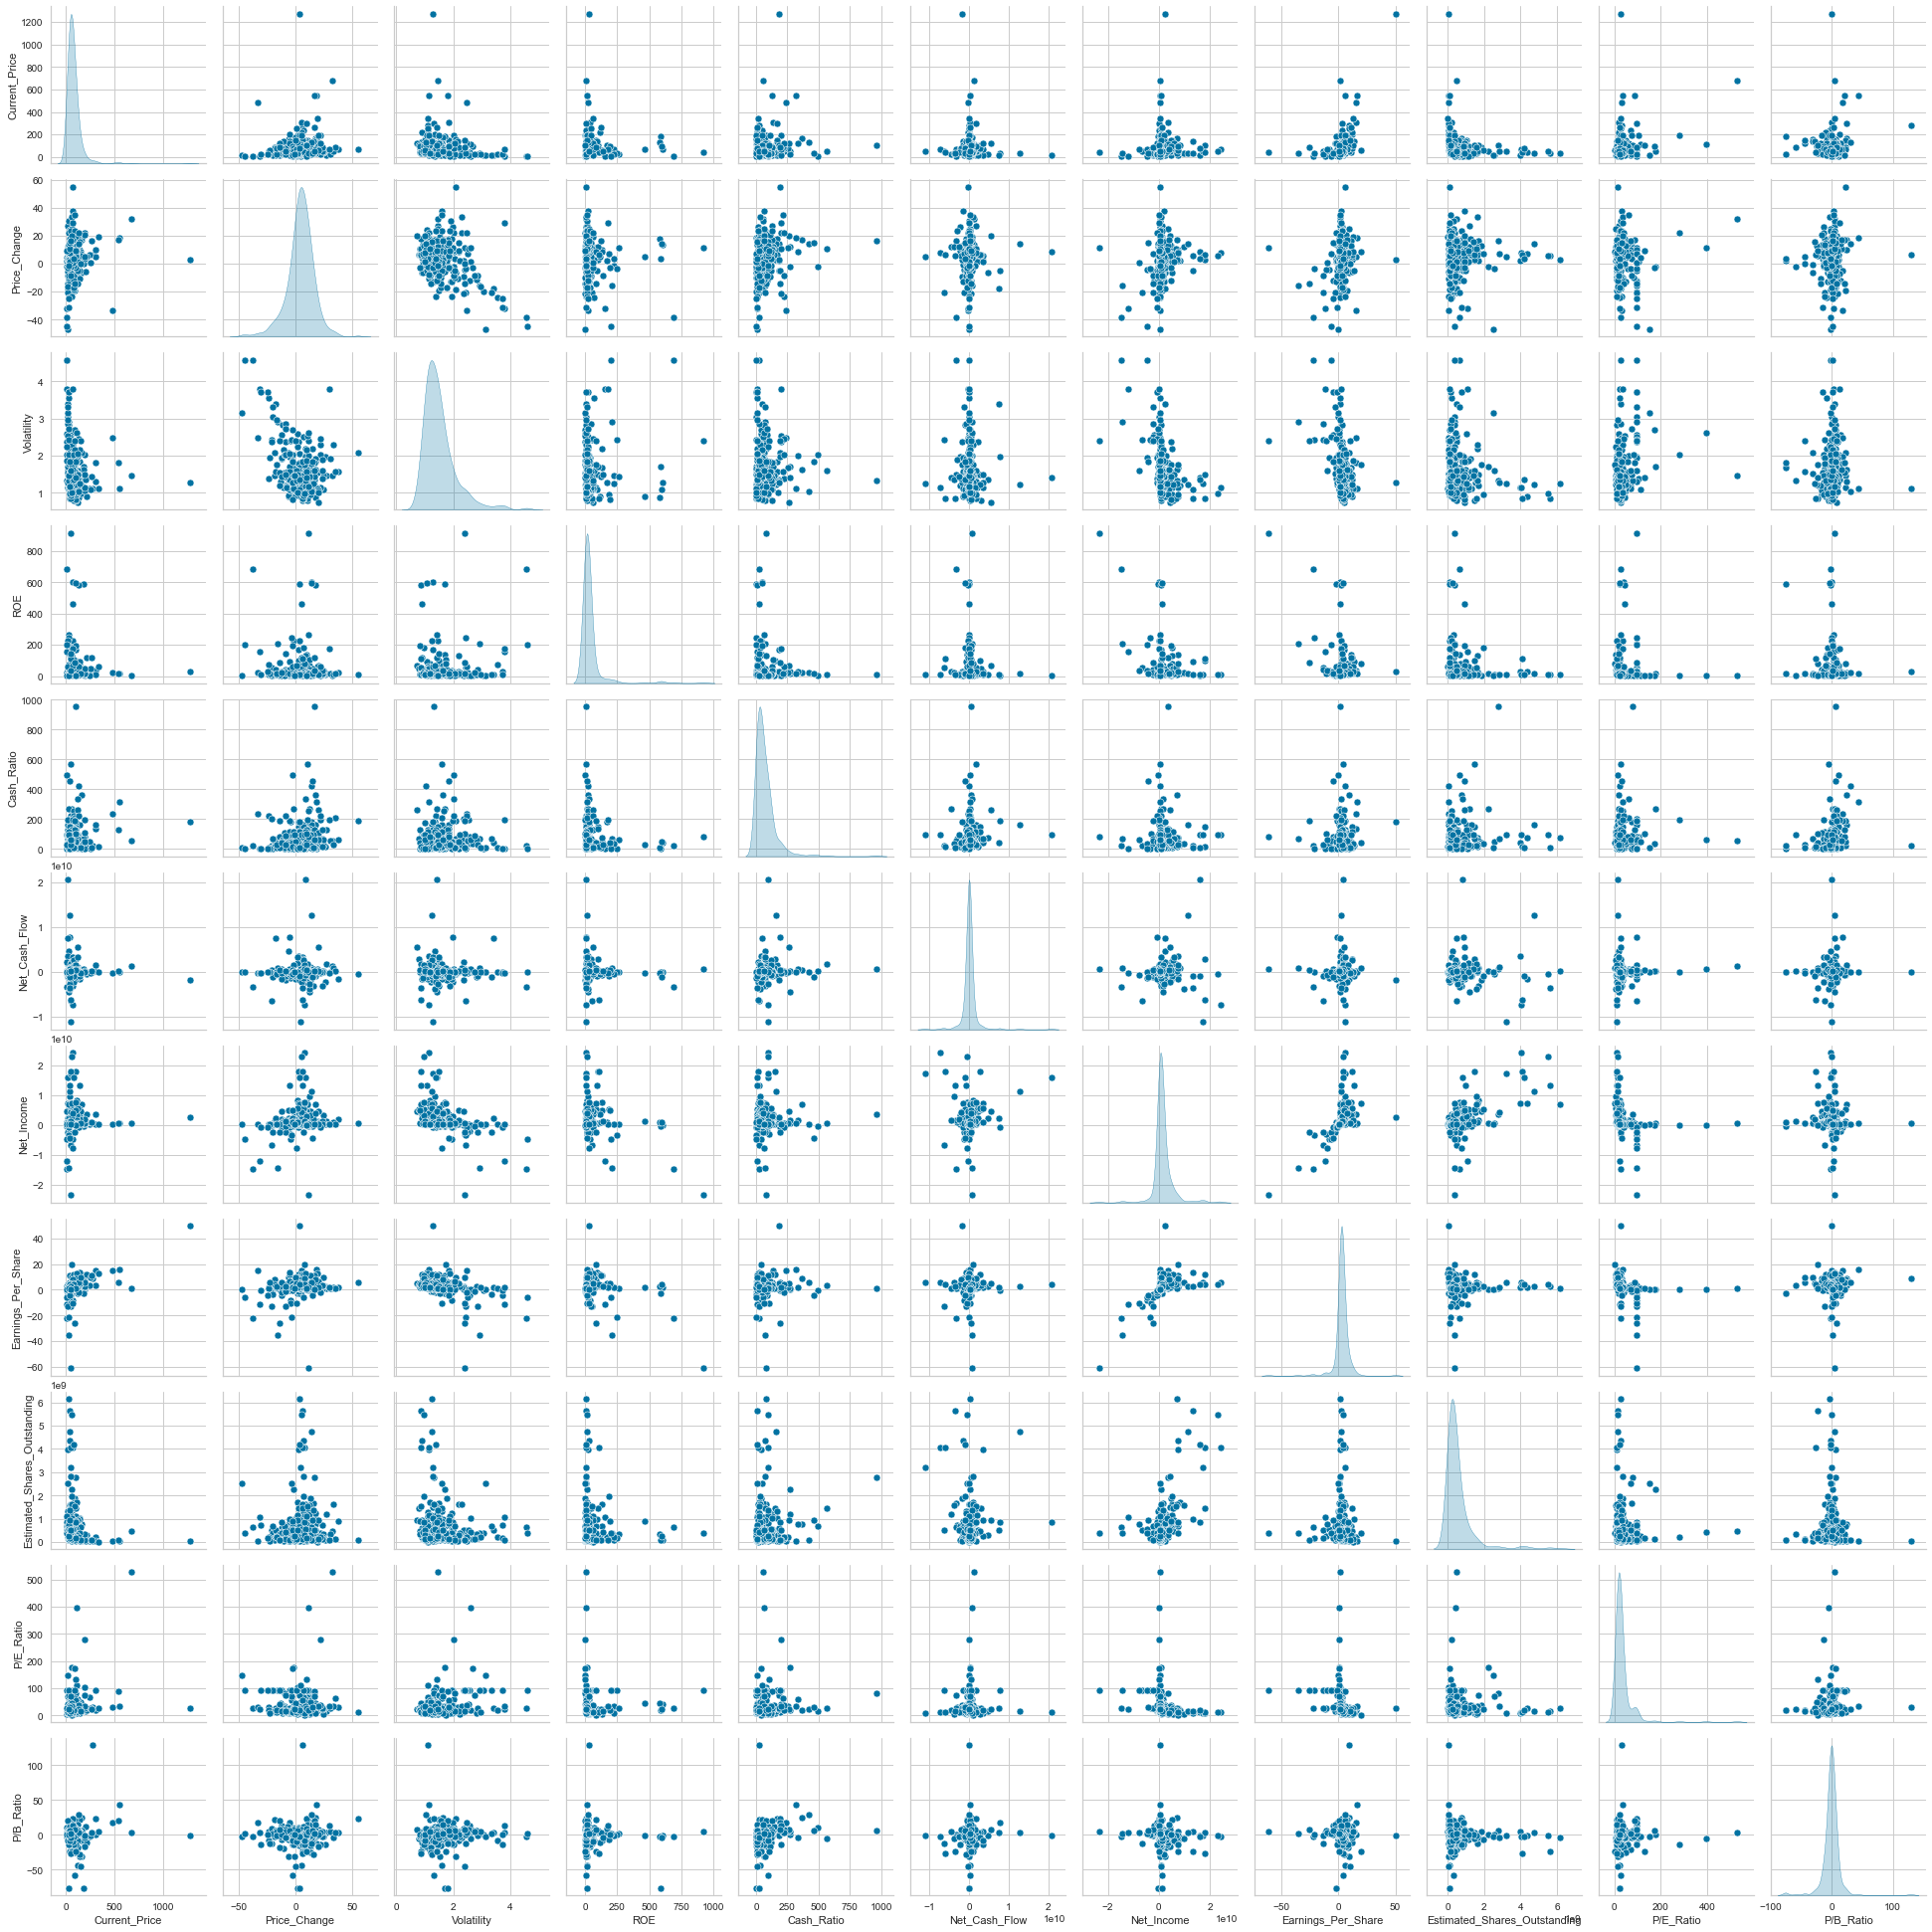

<IPython.core.display.Javascript object>

In [26]:
sns.pairplot(data=df, diag_kind="kde")
plt.show()

#### What does the distribution of stock prices look like?

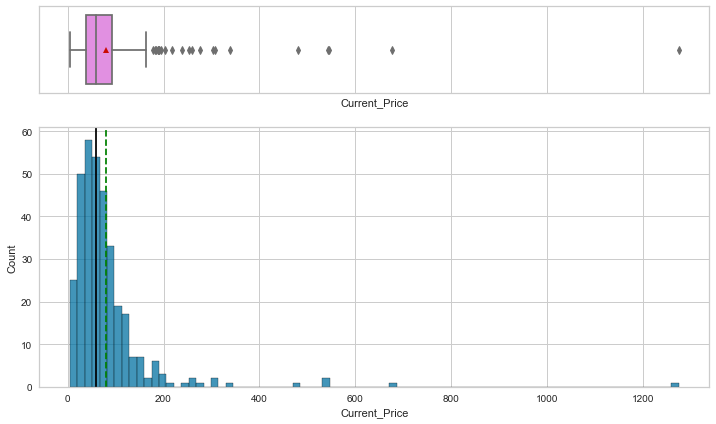

<IPython.core.display.Javascript object>

In [27]:
histogram_boxplot(df, "Current_Price")

* The distribution of stock prices is right skewed with few upper outliers.

#### The stocks of which economic sector have seen the maximum price increase on average?

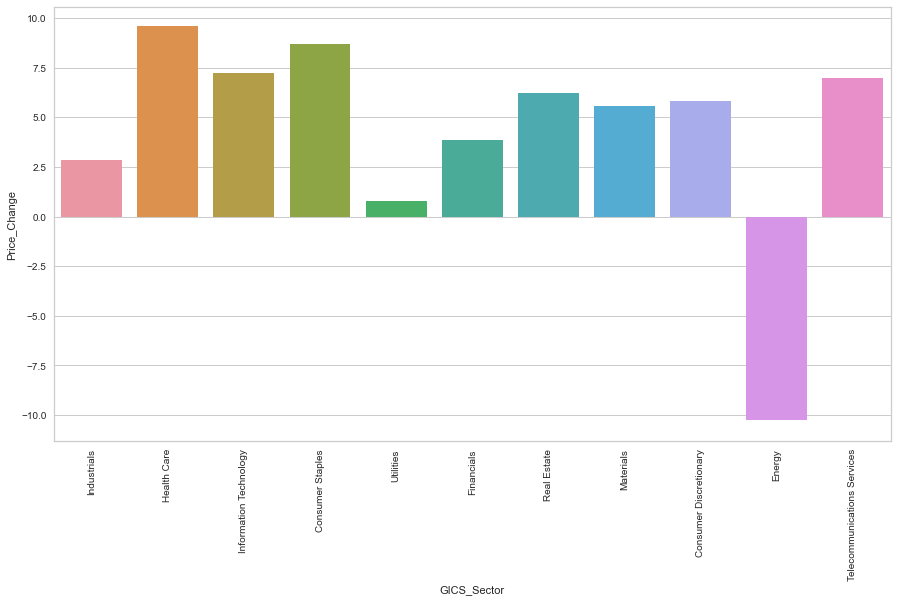

GICS_Sector
Health Care                     9.585652
Consumer Staples                8.684750
Information Technology          7.217476
Telecommunications Services     6.956980
Real Estate                     6.205548
Consumer Discretionary          5.846093
Materials                       5.589738
Financials                      3.865406
Industrials                     2.833127
Utilities                       0.803657
Energy                        -10.228289
Name: Price_Change, dtype: float64

<IPython.core.display.Javascript object>

In [28]:
plt.figure(figsize=(15, 8))
sns.barplot(data=df, x="GICS_Sector", y="Price_Change", ci=False)
plt.xticks(rotation=90)
plt.show()
df.groupby("GICS_Sector")["Price_Change"].mean().sort_values(ascending=False)

* The Health Care sector has the maximum price increase on average. The Energy sector has the maximum price decrease on average.

#### How are the different variables correlated with each other?

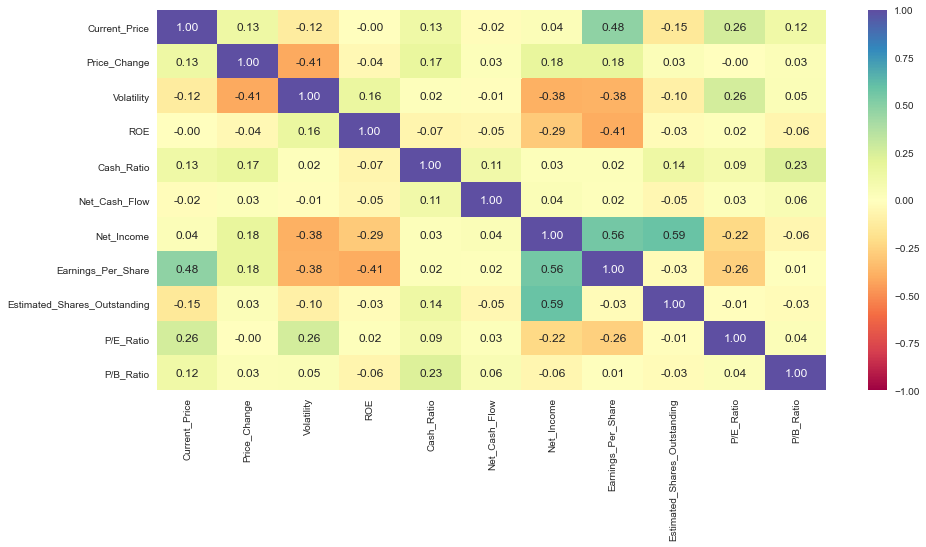

<IPython.core.display.Javascript object>

In [29]:
# Plotting heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* There is no high correlation between the variables in the data.

#### Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?

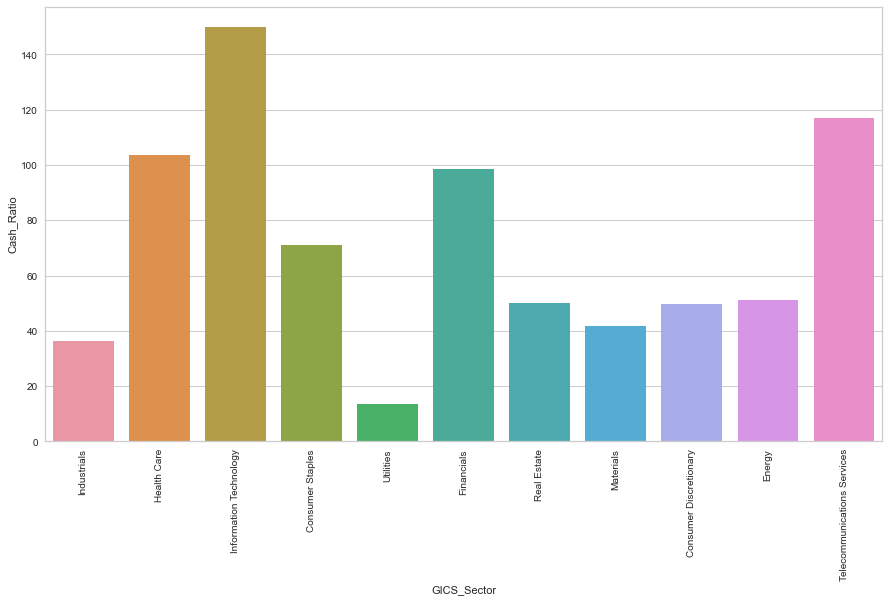

<IPython.core.display.Javascript object>

In [30]:
plt.figure(figsize=(15, 8))
sns.barplot(data=df, x="GICS_Sector", y="Cash_Ratio", ci=False)
plt.xticks(rotation=90)
plt.show()

* The information technology sector has the highest cash ratio followed by Telecommuncations Services.
* The utilities sector has the least cash ratio of less than 20.

#### P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

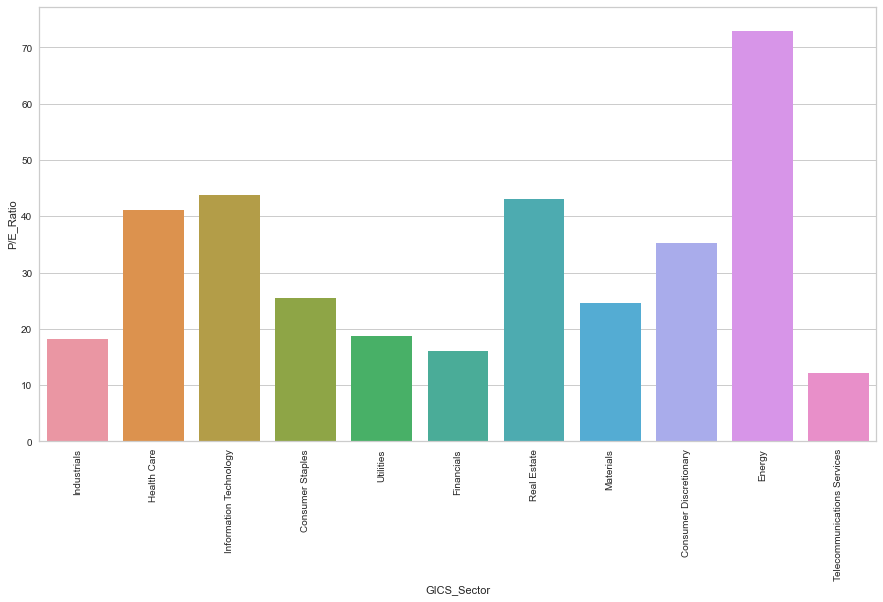

<IPython.core.display.Javascript object>

In [31]:
plt.figure(figsize=(15, 8))
sns.barplot(data=df, x="GICS_Sector", y="P/E_Ratio", ci=False)
plt.xticks(rotation=90)
plt.show()

* The energy sector has the highest P/E ratio followed by Information technology and Real Estate sector.
* The telecommuications services sector has the least P/E ratio.

## Data Preprocessing

#### Outlier check

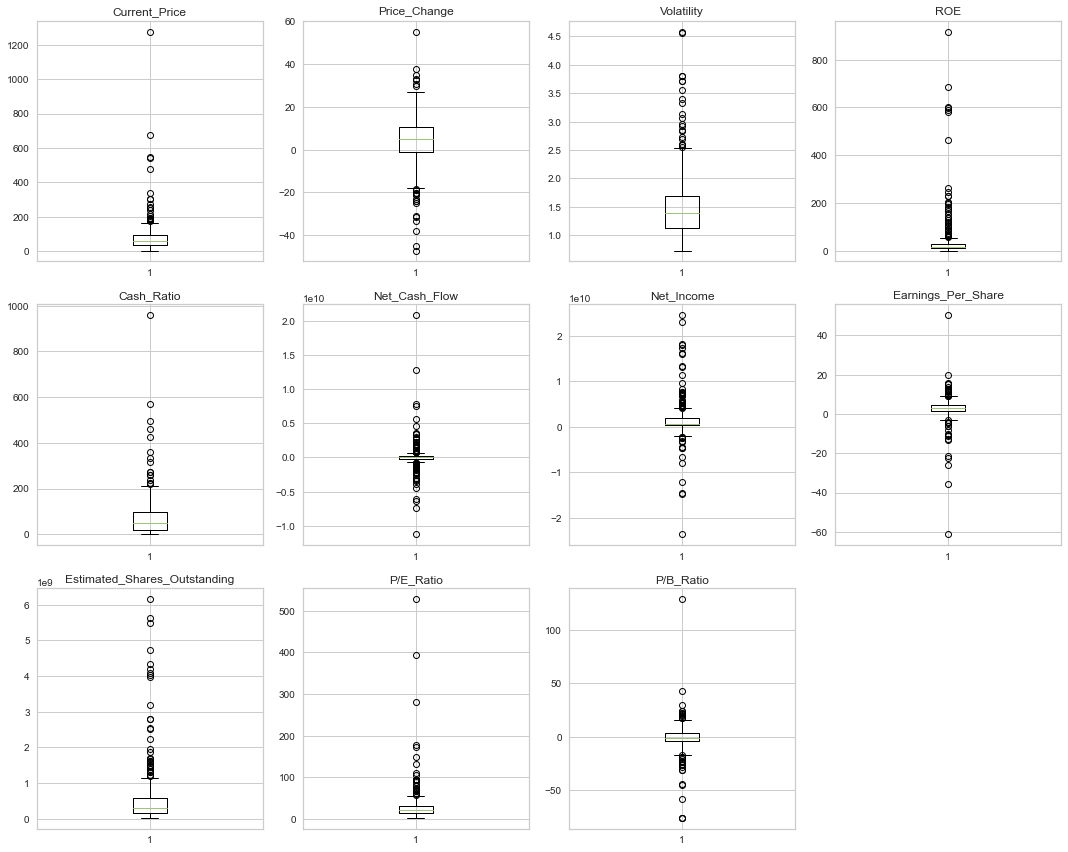

<IPython.core.display.Javascript object>

In [32]:
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* There are many outliers in the data for every variable. We will proceed without treating the outliers as the stock market sometimes have spikes in price and can have extreme values. 

#### Scaling

In [33]:
# scaling the dataset before clustering
scaler = StandardScaler()
subset = df[numeric_columns].copy()
subset_scaled = scaler.fit_transform(subset)

<IPython.core.display.Javascript object>

In [34]:
# creating a dataframe of the scaled columns
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

<IPython.core.display.Javascript object>

## K-means Clustering

In [35]:
# creating a copy of the scaled dataframe
k_means_df = subset_scaled_df.copy()

<IPython.core.display.Javascript object>

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2652173220958
Number of Clusters: 4 	Average Distortion: 2.175554082632614
Number of Clusters: 5 	Average Distortion: 2.136736813019716
Number of Clusters: 6 	Average Distortion: 2.0924327375841307
Number of Clusters: 7 	Average Distortion: 2.0149376989636085
Number of Clusters: 8 	Average Distortion: 1.9879057594803689
Number of Clusters: 9 	Average Distortion: 1.90974241177123
Number of Clusters: 10 	Average Distortion: 1.850755598192155
Number of Clusters: 11 	Average Distortion: 1.793239184911712
Number of Clusters: 12 	Average Distortion: 1.7755119431124797
Number of Clusters: 13 	Average Distortion: 1.7062334516980573
Number of Clusters: 14 	Average Distortion: 1.669926375236863


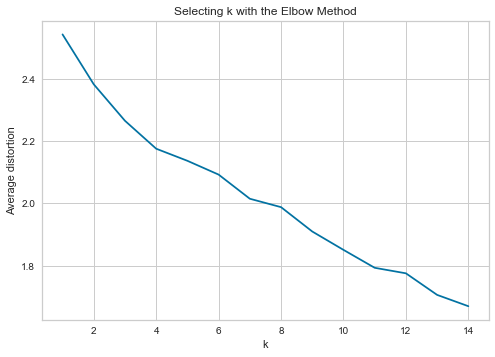

<IPython.core.display.Javascript object>

In [36]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(k_means_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("Selecting k with the Elbow Method")
plt.show()

* The appropriate value of k from the elbow curve seems to be 4 or 5. There is an elbow at 7 too. 

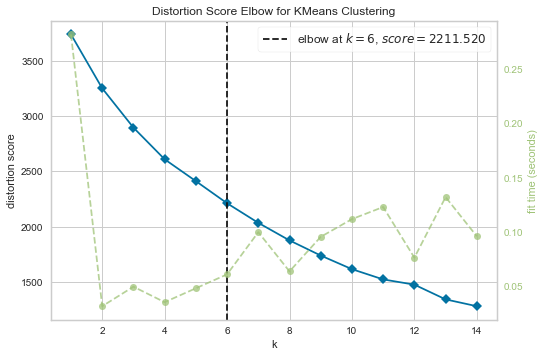

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

<IPython.core.display.Javascript object>

In [37]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

#### Let's check the silhouette scores.

For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.45797710447228496)
For n_clusters = 4, the silhouette score is 0.45434371948348606)
For n_clusters = 5, the silhouette score is 0.42337029703907236)
For n_clusters = 6, the silhouette score is 0.37388744981975003)
For n_clusters = 7, the silhouette score is 0.4051649516789415)
For n_clusters = 8, the silhouette score is 0.23584247460449528)
For n_clusters = 9, the silhouette score is 0.1465881876031706)
For n_clusters = 10, the silhouette score is 0.4105908267211586)
For n_clusters = 11, the silhouette score is 0.1399051002948878)
For n_clusters = 12, the silhouette score is 0.17843171890499238)
For n_clusters = 13, the silhouette score is 0.1394642324687778)
For n_clusters = 14, the silhouette score is 0.14349578638078558)
For n_clusters = 15, the silhouette score is 0.13902216940599435)


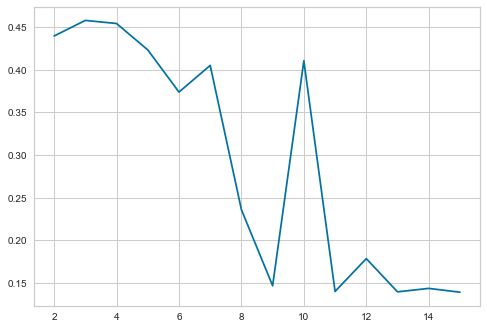

<IPython.core.display.Javascript object>

In [38]:
sil_score = []
cluster_list = list(range(2, 16))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((k_means_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

* The Silhoutte score is better for n_clusters = 4 an 5 when compared to n_clusters=7.

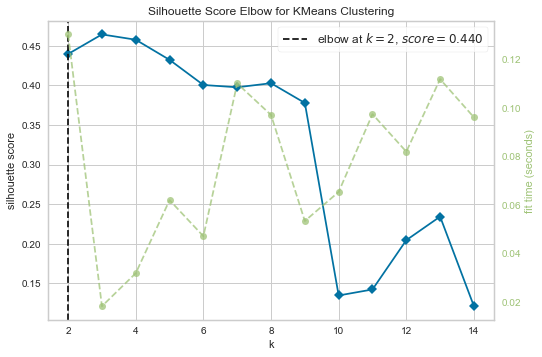

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

<IPython.core.display.Javascript object>

In [39]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

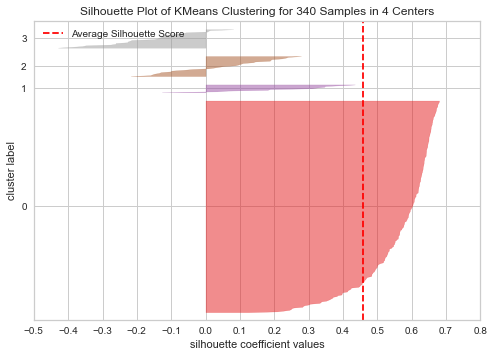

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [40]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

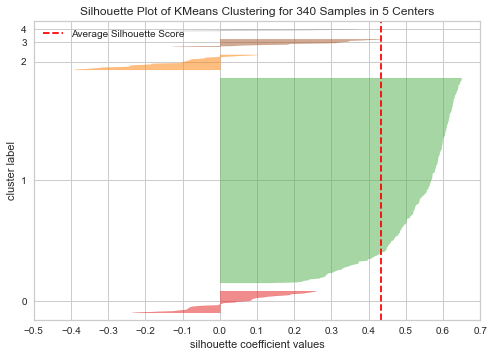

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [41]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

#### At 4, there are well separated clusters and the Silhoutte score is also good. Hence, let's proceed with 4 as the number of clusters.

In [42]:
# let's take 4 as number of clusters
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(k_means_df)

KMeans(n_clusters=4, random_state=0)

<IPython.core.display.Javascript object>

In [43]:
df_km = df.copy()  # making a copy of original dataframe

# adding kmeans cluster labels to the original and scaled dataframes
df_km["K_means_segments"] = kmeans.labels_
k_means_df["K_means_segments"] = kmeans.labels_

<IPython.core.display.Javascript object>

### Cluster Profiling

In [44]:
cluster_profile_km = df_km.groupby("K_means_segments").mean()

<IPython.core.display.Javascript object>

In [45]:
cluster_profile_km["count_in_each_segments"] = (
    df_km.groupby("K_means_segments")["Current_Price"].count().values
)

<IPython.core.display.Javascript object>

In [46]:
# let's display cluster profiles
cluster_profile_km.style.highlight_max(color="lightgreen", axis=0)

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio,count_in_each_segments
K_means_segments,,,,,,,,,,,,
0,234.170932,13.400685,1.729989,25.600000,277.640000,1554926560.000000,1572611680.000000,6.045200,578316318.948800,74.960824,14.402452,25
1,38.099260,-15.370329,2.910500,107.074074,50.037037,-159428481.481481,-3887457740.740741,-9.473704,480398572.845926,90.619220,1.342067,27
2,50.517273,5.747586,1.130399,31.090909,75.909091,-1072272727.272727,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11
3,72.399112,5.066225,1.388319,34.620939,53.000000,-14046223.826715,1482212389.891697,3.621029,438533835.667184,23.843656,-3.358948,277


<IPython.core.display.Javascript object>

In [47]:
## To print the companies in each cluster
for cl in df_km["K_means_segments"].unique():
    print(
        "In cluster {}, the following {} companies are present:".format(
            cl, df_km[df_km["K_means_segments"] == cl]["Security"].nunique()
        )
    )
    print(df_km[df_km["K_means_segments"] == cl]["Security"].unique())
    print()

In cluster 3, the following 277 companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown C

<IPython.core.display.Javascript object>

In [48]:
# To print the different sectors and count of companies in each cluster
df_km.groupby(["K_means_segments", "GICS_Sector"])["Security"].count()

K_means_segments  GICS_Sector                
0                 Consumer Discretionary          6
                  Consumer Staples                1
                  Energy                          1
                  Financials                      1
                  Health Care                     9
                  Information Technology          5
                  Real Estate                     1
                  Telecommunications Services     1
1                 Energy                         22
                  Industrials                     1
                  Information Technology          3
                  Materials                       1
2                 Consumer Discretionary          1
                  Consumer Staples                1
                  Energy                          1
                  Financials                      3
                  Health Care                     2
                  Information Technology          1
                  

<IPython.core.display.Javascript object>

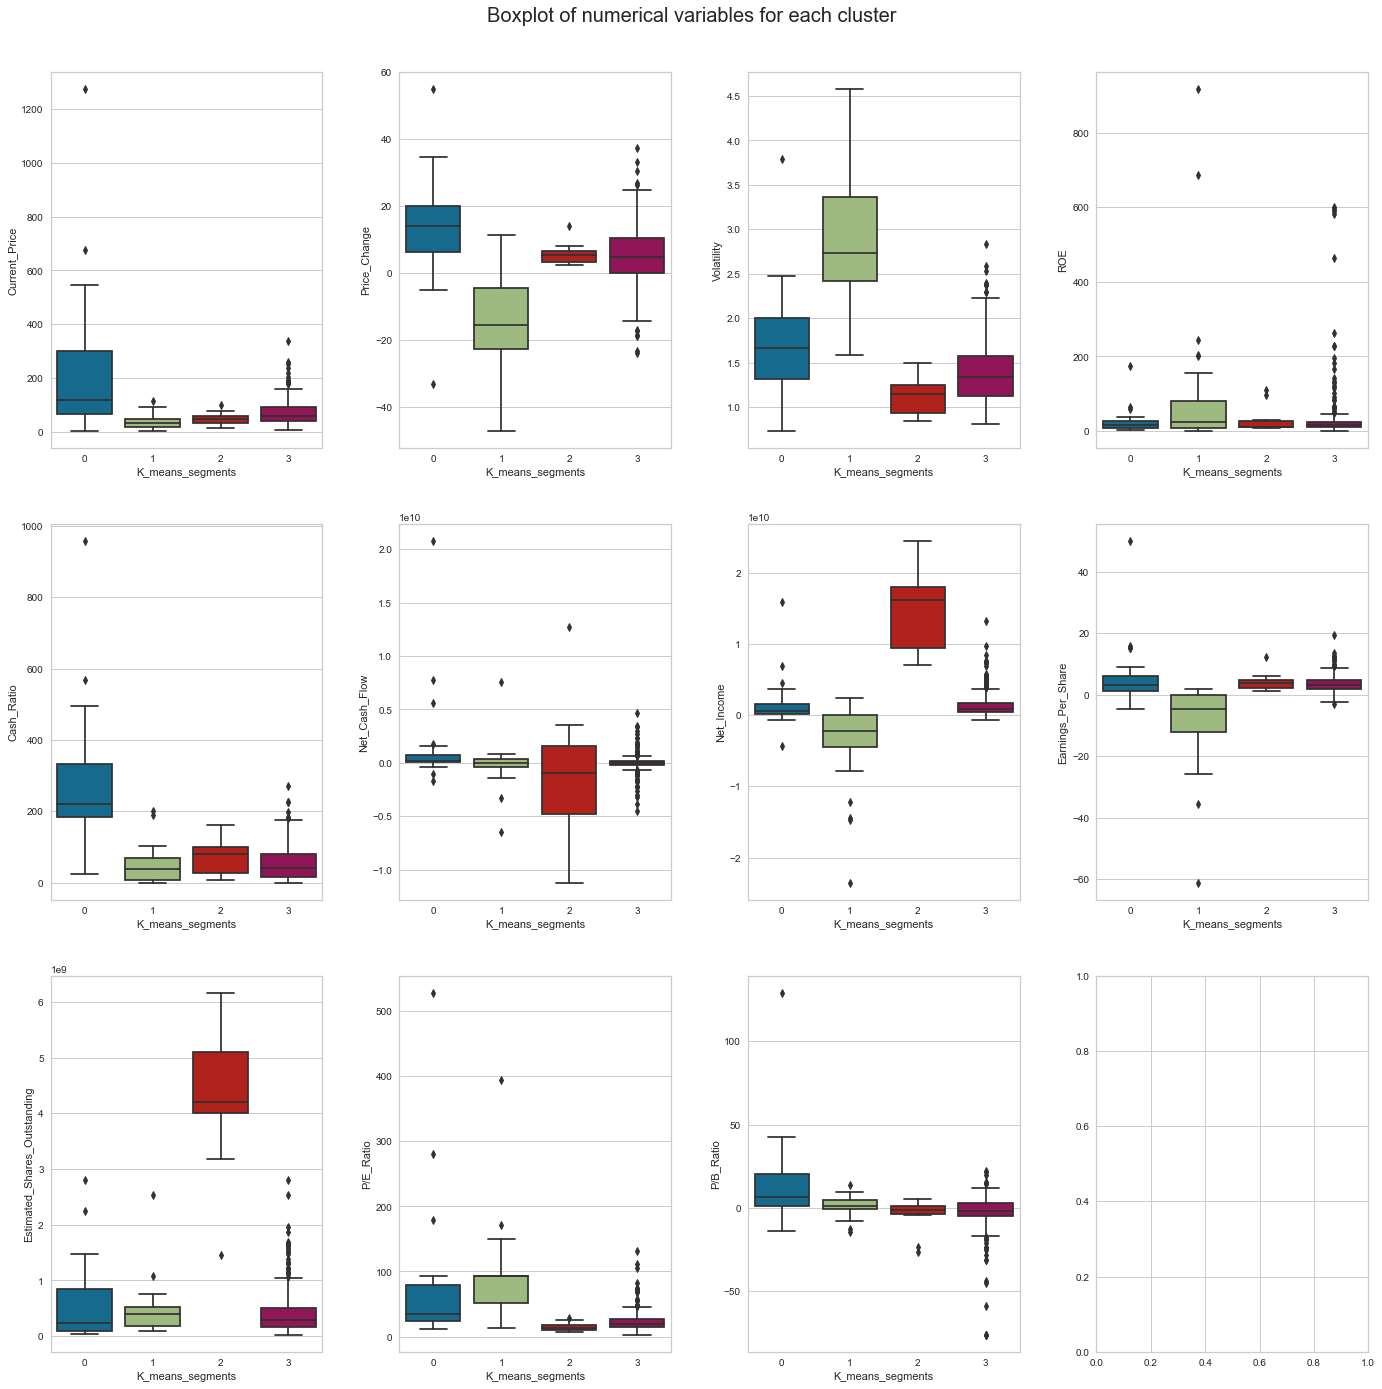

<IPython.core.display.Javascript object>

In [49]:
fig, axes = plt.subplots(3, 4, figsize=(20, 20))
fig.suptitle("Boxplot of numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(3):
    for jj in range(4):
        if counter < 11:
            sns.boxplot(
                ax=axes[ii][jj],
                data=df_km,
                y=df_km.columns[4 + counter],
                x="K_means_segments",
            )
            counter = counter + 1

fig.tight_layout(pad=3.0)

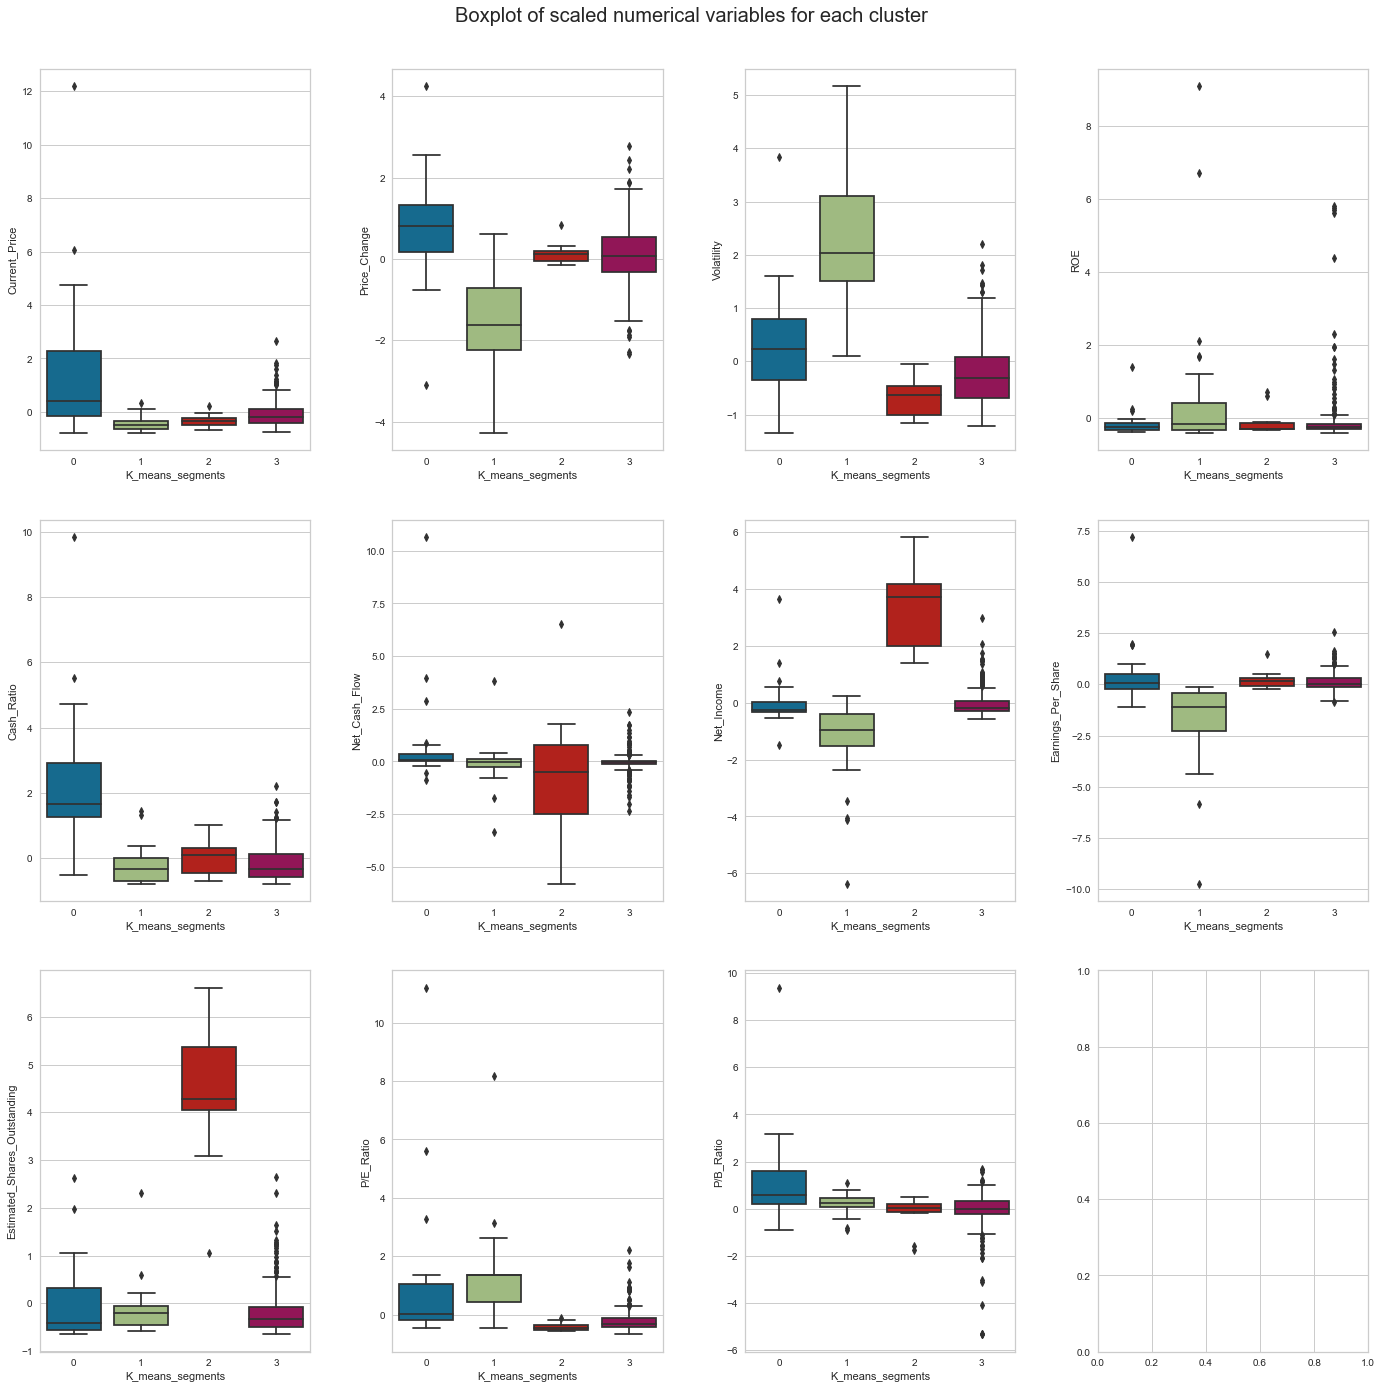

<IPython.core.display.Javascript object>

In [50]:
fig, axes = plt.subplots(3, 4, figsize=(20, 20))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for i in range(3):
    for j in range(4):
        if counter < 11:
            sns.boxplot(
                ax=axes[i][j],
                data=k_means_df,
                y=k_means_df.columns[counter],
                x="K_means_segments",
            )
            counter = counter + 1

fig.tight_layout(pad=3.0)

### Insights

- **Cluster 0**:
    - There are 25 companies in this cluster.
    - Price of stocks is very high.
    - Higher range of positive price change percentage.
    - Moderately volatile with value less than 2.
    - ROE value is not bad.
    - Cash ratio is very high.
    - Have a positive net cash flow.
    - Companies in this cluster have a good positive net income.
    - Have a good positive earnings per share.
    - Have a good amount of estimated shares outstanding.
    - Have a moderate P/E ratio.
    - Have high P/B ratio.


- **Cluster 1**:
    - There are 27 companies in this cluster.
    - Price of stocks is very less in this cluster.
    - Higher range of negative price change percentage.
    - Highly volatile with values above 2.25.
    - Has good ROE value.
    - Cash ratio is less.
    - Net cash flow is very less with positive and negative values.
    - Companies in this cluster have a negative net income.
    - Have a good range of negative earnings per share.
    - Have less estimated shares outstanding.
    - Have a higher P/E ratio when compared to other clusters.
    - P/B Ratio is less.


- **Cluster 2**:
    - There are 11 companies in this cluster.
    - Price of stocks is very less in this cluster.
    - Moderate level of positive price change percentage.
    - Less volatile with value less than 1.25.
    - ROE is not bad.
    - Cash ratio is not bad.
    - Have a high range of net cash flow with more negative values.
    - Companies in this cluster maintain high positive net income.
    - Have a good positive earnings per share.
    - Have very high estimated shares outstanding.
    - P/E ratio is very less.
    - P/B ratio is very less, with few negative values.


- **Cluster 3**:
    - There are 277 companies in this cluster.
    - Price of stocks is less than the average price.
    - Moderate level of positive price change percentage with few exceptions of negative values.
    - Not much volatile with value between 1.25 to 1.6.
    - ROE is good few exceptions of having higher value too.
    - Cash ratio is not bad.
    - Net cash flow is very less with few exceptions of high positive and negative values.
    - Companies in this cluster have a positive net income.
    - Have a good positive earnings per share.
    - Have very less estimated shares outstanding.
    - P/E Ratio is less with some exceptions.
    - P/B Ratio is very less with some exceptions of having high negative values too.


## Hierarchical Clustering

In [51]:
hierarchial_df = subset_scaled_df.copy()  # creating a copy of the scaled data

<IPython.core.display.Javascript object>

In [52]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hierarchial_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hierarchial_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9259195530524591.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850003.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159737.
Cophenetic correl

<IPython.core.display.Javascript object>

In [53]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage.


<IPython.core.display.Javascript object>

#### Let's explore different linkage methods with Euclidean distance only.

In [54]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hierarchial_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hierarchial_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.


<IPython.core.display.Javascript object>

In [55]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


<IPython.core.display.Javascript object>

#### Let's see the dendrograms for the different linkage methods.

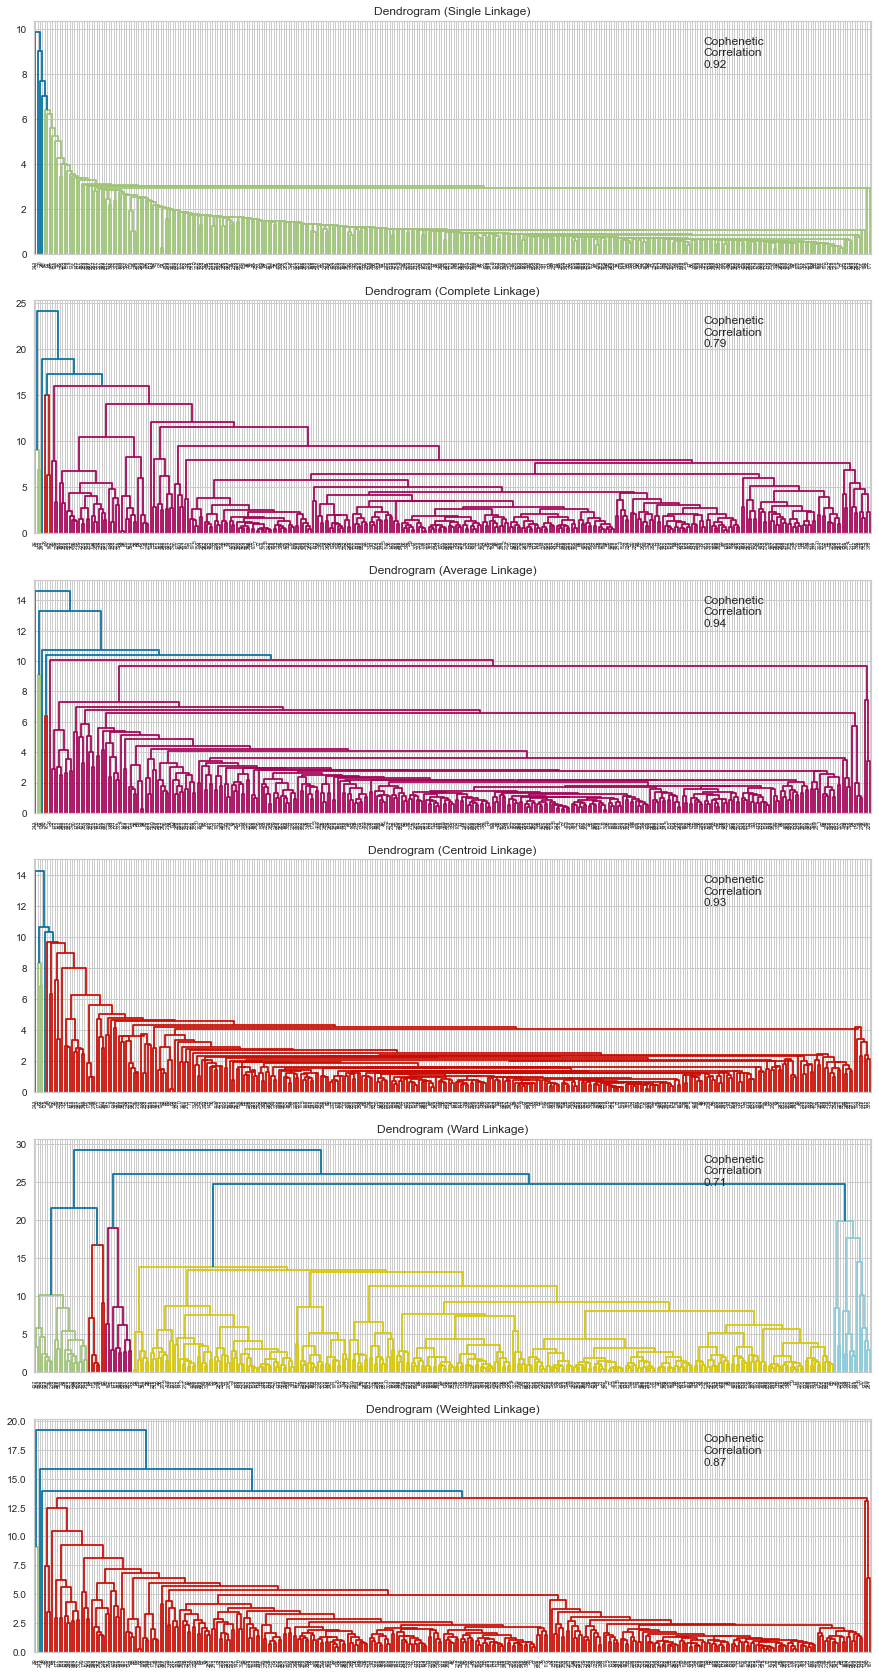

<IPython.core.display.Javascript object>

In [56]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hierarchial_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hierarchial_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [57]:
# let's create a dataframe to compare cophenetic correlations for each linkage method
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc

,Linkage,Cophenetic Coefficient
0,single,0.923227
1,complete,0.787328
2,average,0.942254
3,centroid,0.931401
4,ward,0.710118
5,weighted,0.869378


<IPython.core.display.Javascript object>

#### Let's see the dendrogram for Chebyshev and Manhattan distances with average and weighted linkage methods (as they gave high cophenetic correlation values).

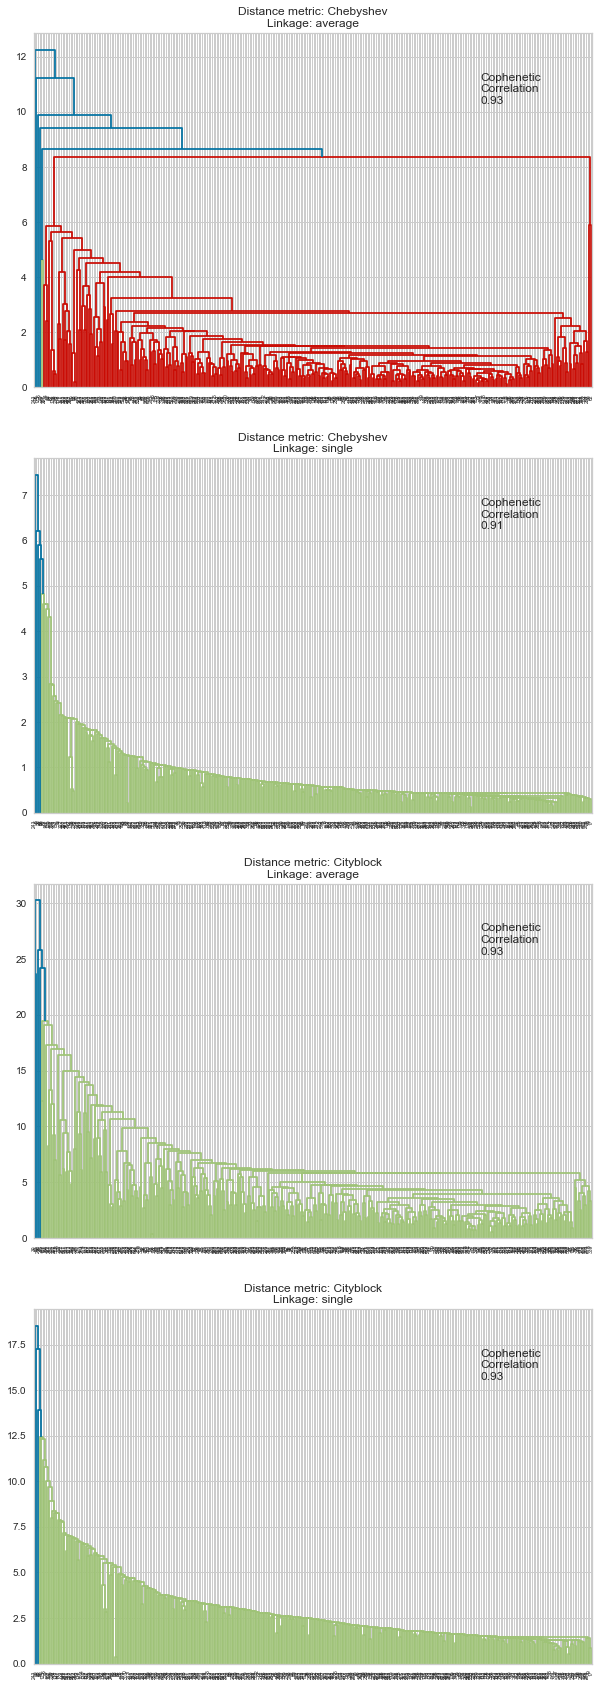

<IPython.core.display.Javascript object>

In [58]:
# list of distance metrics
distance_metrics = ["chebyshev", "cityblock"]

# list of linkage methods
linkage_methods = ["average", "single"]

# to create a subplot image
fig, axs = plt.subplots(
    len(distance_metrics) + len(distance_metrics), 1, figsize=(10, 30)
)

i = 0
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hierarchial_df, metric=dm, method=lm)

        dendrogram(Z, ax=axs[i])
        axs[i].set_title("Distance metric: {}\nLinkage: {}".format(dm.capitalize(), lm))

        coph_corr, coph_dist = cophenet(Z, pdist(hierarchial_df))
        axs[i].annotate(
            f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
            (0.80, 0.80),
            xycoords="axes fraction",
        )
        i += 1

For n_clusters = 2, the silhouette score is 0.4273882711698957)
For n_clusters = 3, the silhouette score is 0.44676309955813637)
For n_clusters = 4, the silhouette score is 0.4649072109509725)
For n_clusters = 5, the silhouette score is 0.4218370377705776)
For n_clusters = 6, the silhouette score is 0.42820147555126514)
For n_clusters = 7, the silhouette score is 0.433370262828766)
For n_clusters = 8, the silhouette score is 0.4372840329903414)
For n_clusters = 9, the silhouette score is 0.44231997574836784)
For n_clusters = 10, the silhouette score is 0.44315913398803625)
For n_clusters = 11, the silhouette score is 0.39118547077778565)
For n_clusters = 12, the silhouette score is 0.16279644254791684)
For n_clusters = 13, the silhouette score is 0.16760733011684964)
For n_clusters = 14, the silhouette score is 0.17348679814741277)
For n_clusters = 15, the silhouette score is 0.17867488654602687)


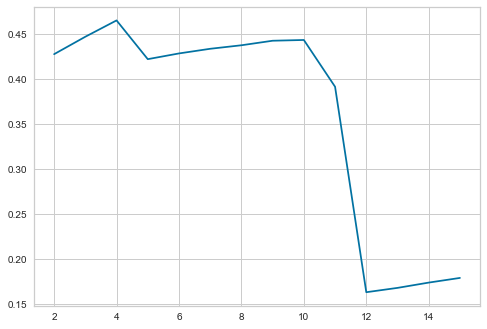

<IPython.core.display.Javascript object>

In [59]:
sil_score_hc = []
cluster_list = list(range(2, 16))
for n_clusters in cluster_list:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    preds = clusterer.fit_predict((hierarchial_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(hierarchial_df, preds)
    sil_score_hc.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score_hc)
plt.show()

**Observations**

- The cophenetic correlation is highest for average linkage method.
- Dendrogram for Ward linkage using euclidean distance shows distinct and separate clusters.
- According to the Silhoutte score, 4 appear to be a good number of clusters.
- Let's proceed with n_clusters as 4, distance metric as "euclidean" and linkage method as "Ward".

In [60]:
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
HCmodel.fit(hierarchial_df)

AgglomerativeClustering(n_clusters=4)

<IPython.core.display.Javascript object>

In [61]:
df_hc = df.copy()  # making a copy of original dataframe

# adding hierarchical cluster labels to the original and scaled dataframes
hierarchial_df["HC_Segments"] = HCmodel.labels_
df_hc["HC_Segments"] = HCmodel.labels_

<IPython.core.display.Javascript object>

### Cluster Profiling

In [62]:
cluster_profile_hc = df_hc.groupby("HC_Segments").mean()

<IPython.core.display.Javascript object>

In [63]:
cluster_profile_hc["count_in_each_segments"] = (
    df_hc.groupby("HC_Segments")["Current_Price"].count().values
)

<IPython.core.display.Javascript object>

In [64]:
# let's display cluster profiles
cluster_profile_hc.style.highlight_max(color="lightgreen", axis=0)

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio,count_in_each_segments
HC_Segments,,,,,,,,,,,,
0,48.006208,-11.263107,2.590247,196.551724,40.275862,-495901724.137931,-3597244655.172414,-8.689655,486319827.294483,75.110924,-2.162622,29
1,326.198218,10.563242,1.642560,14.400000,309.466667,288850666.666667,864498533.333333,7.785333,544900261.301333,113.095334,19.142151,15
2,42.848182,6.270446,1.123547,22.727273,71.454545,558636363.636364,14631272727.272728,3.410000,4242572567.290909,15.242169,-4.924615,11
3,72.760400,5.213307,1.427078,25.603509,60.392982,79951512.280702,1538594322.807018,3.655351,446472132.228456,24.722670,-2.647194,285


<IPython.core.display.Javascript object>

In [65]:
## To print the companies in each cluster
for cl in df_hc["HC_Segments"].unique():
    print(
        "In cluster {}, the following {} companies are present:".format(
            cl, df_hc[df_hc["HC_Segments"] == cl]["Security"].nunique()
        )
    )
    print(df_hc[df_hc["HC_Segments"] == cl]["Security"].unique())
    print()

In cluster 3, the following 285 companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb

<IPython.core.display.Javascript object>

In [66]:
# To print the different sectors in each cluster and the number of companies
df_hc.groupby(["HC_Segments", "GICS_Sector"])["Security"].count()

HC_Segments  GICS_Sector                
0            Consumer Discretionary          1
             Consumer Staples                2
             Energy                         22
             Financials                      1
             Industrials                     1
             Information Technology          1
             Materials                       1
1            Consumer Discretionary          3
             Consumer Staples                1
             Health Care                     5
             Information Technology          4
             Real Estate                     1
             Telecommunications Services     1
2            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      4
             Health Care                     1
             Information Technology          1
             Telecommunications Services     2
3            Consum

<IPython.core.display.Javascript object>

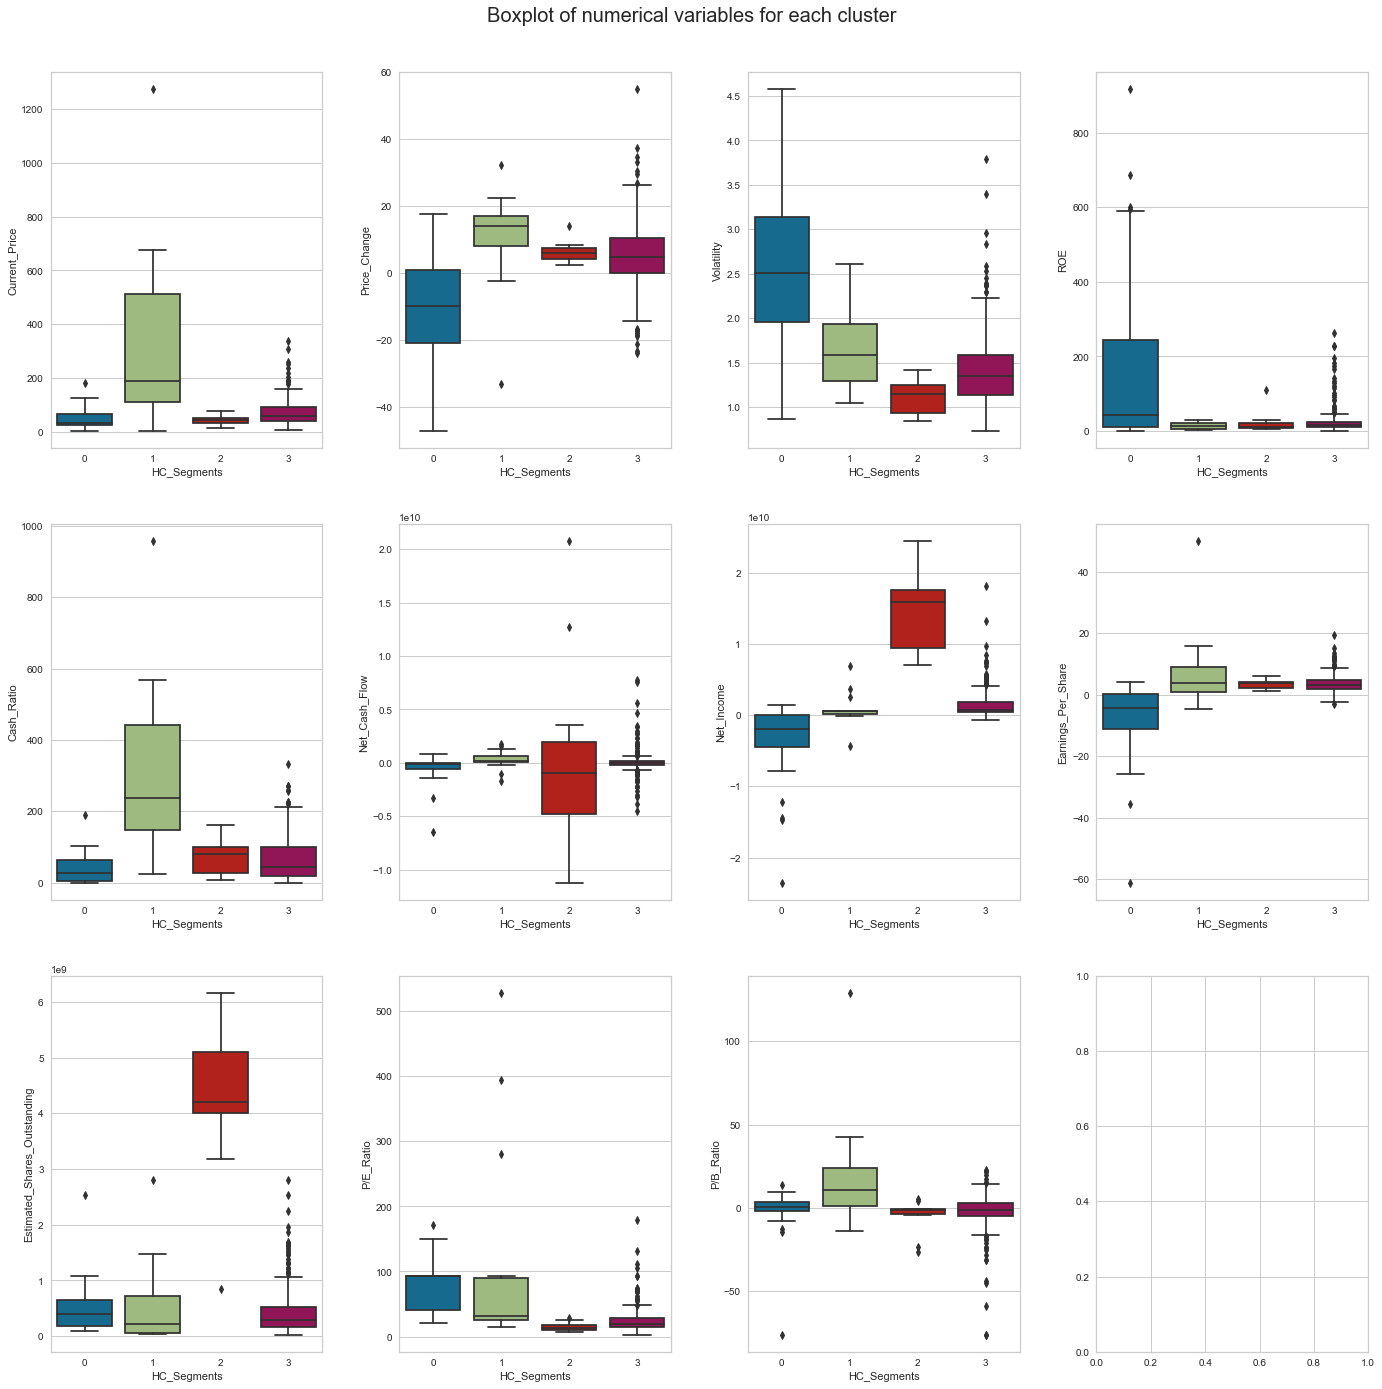

<IPython.core.display.Javascript object>

In [67]:
# Plotting boxplot of numerical variables for each cluster
fig, axes = plt.subplots(3, 4, figsize=(20, 20))
fig.suptitle("Boxplot of numerical variables for each cluster", fontsize=20)
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 11:
            sns.boxplot(
                ax=axes[ii][jj],
                data=df_hc,
                y=df_hc.columns[4 + counter],
                x="HC_Segments",
            )
            counter = counter + 1

fig.tight_layout(pad=3.0)

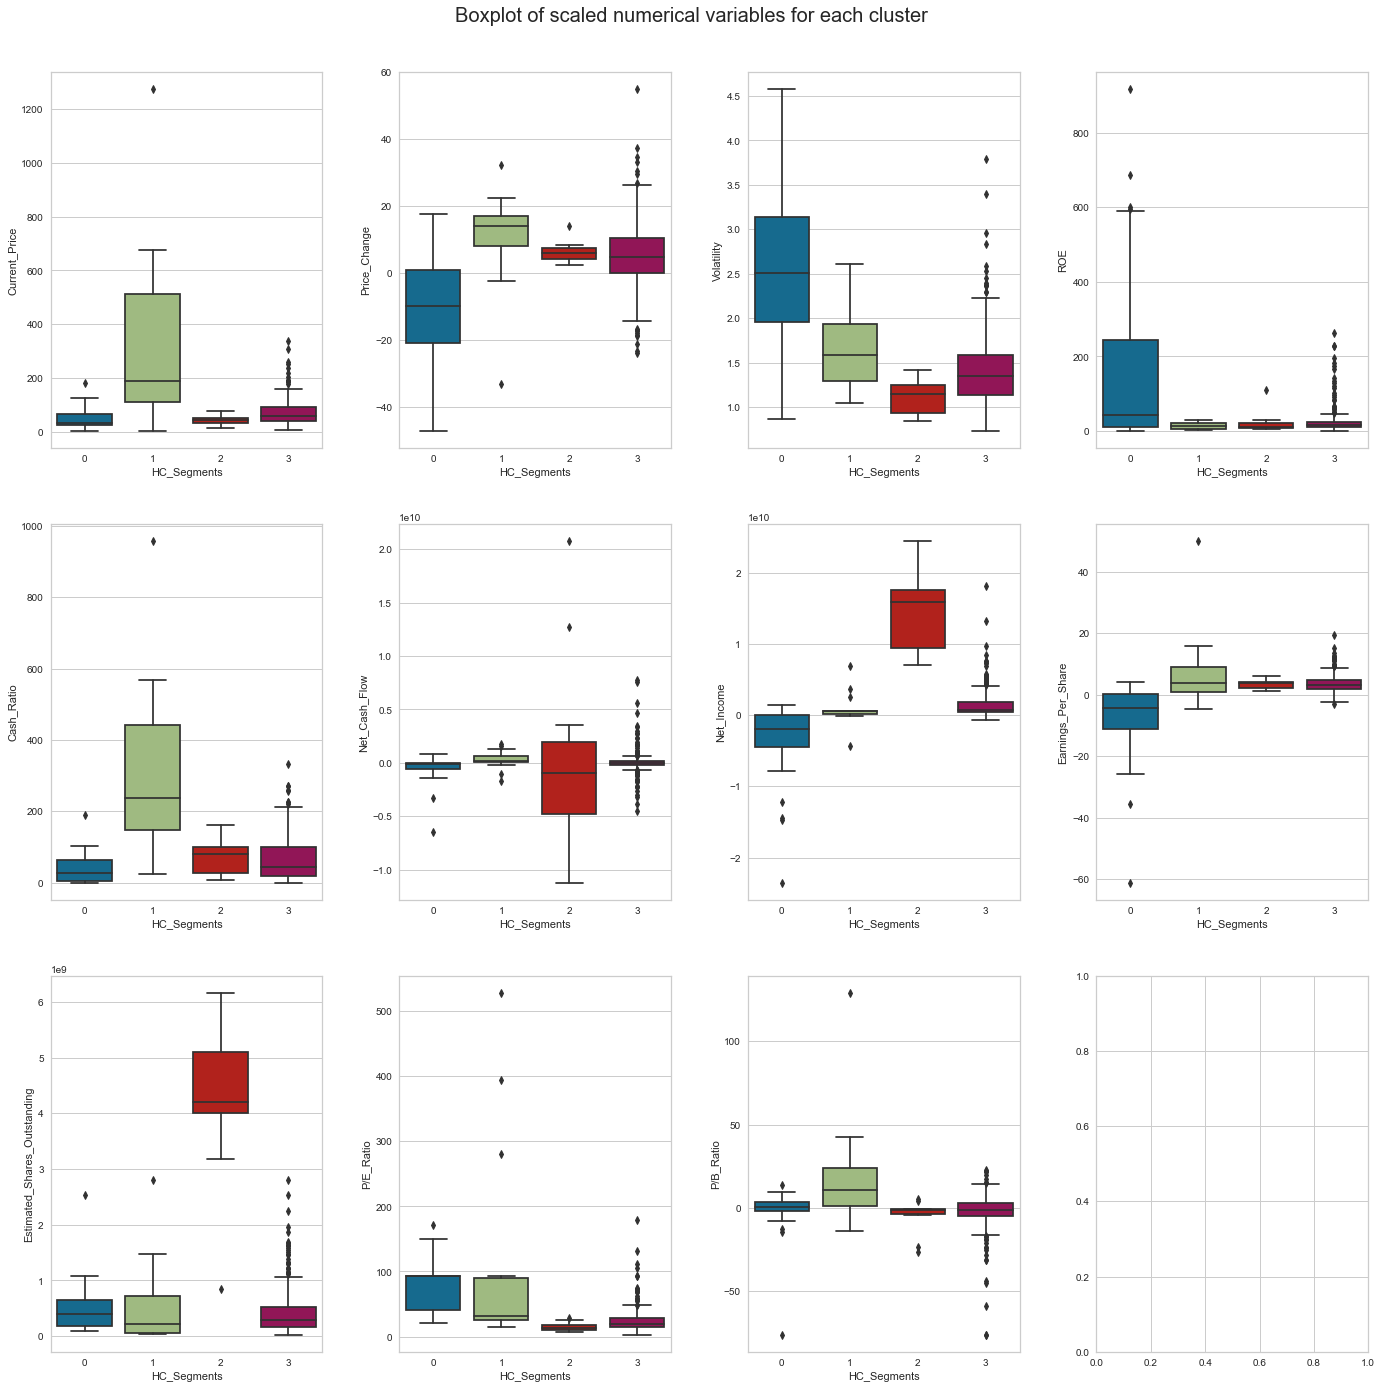

<IPython.core.display.Javascript object>

In [68]:
# Plotting boxplot of scaled numerical variables for each cluster
fig, axes = plt.subplots(3, 4, figsize=(20, 20))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 11:
            sns.boxplot(
                ax=axes[ii][jj],
                data=df_hc,
                y=df_hc.columns[4 + counter],
                x="HC_Segments",
            )
            counter = counter + 1

fig.tight_layout(pad=3.0)

### Insights

- **Cluster 0**:
    - There are 29 companies in this cluster.
    - Price of stocks is less in this cluster.
    - High range of negative price change percentage.
    - Highly volatile with values greater than 2.
    - ROE value is high.
    - Cash ratio is less.
    - Very low, negative net cash flow.
    - Companies in this cluster have a negative net income.
    - Have good, negative earnings per share.
    - Have a good amount of estimated shares outstanding.
    - Have a higher P/E Ratio when compared to other clusters.
    - P/B Ration is very less with some exceptions of having negative values too.


- **Cluster 1**:
    - There are 15 companies in this cluster.
    - Price of stocks is very high(>100).
    - Higher range of positive price change percentage.
    - Moderately volatile with values less than 2.
    - ROE value is not bad.
    - Cash ratio is very high.
    - Have a low, positive net cash flow.
    - Companies in this cluster have a good positive net income.
    - Have a good, positive earnings per share.
    - Have a good amount of estimated shares outstanding.
    - Have a moderate P/E ratio.
    - Have high, positive P/B ratio.
    

- **Cluster 2**:
    - There are 11 companies in this cluster.
    - Price of stocks is very less in this cluster.
    - Moderate level of positive price change percentage.
    - Less volatile with value less than 1.25.
    - ROE is not bad.
    - Cash ratio is not bad.
    - Have a high range of net cash flow with more negative values.
    - Companies in this cluster maintain high positive net income.
    - Have a good positive earnings per share.
    - Have very high estimated shares outstanding.
    - P/E ratio is very less.
    - P/B ratio is very less, with negative values.


- **Cluster 3**:
    - There are 285 companies in this cluster.
    - Price of stocks is less in this cluster.
    - Moderate level of positive price change percentage with few exceptions of negative values.
    - Moderately volatile with values between 1 and 1.6 and few higher outlier values.
    - ROE is not bad with few exceptions of having higher values too.
    - Cash ratio is not bad.
    - Net cash flow is very less with with few exceptions of high positive and negative values.
    - Companies in this cluster have a positive net income.
    - Have a good positive earnings per share.
    - Have a good amount of estimated shares outstanding.
    - P/E Ratio is less with some exceptions.
    - P/B Ratio is less with positive and negative values and some exceptions with high negative values.


## K-means vs Hierarchical Clustering

* The execution time for hierarchial clustering took more time, especially for plotting the dendrograms.
* Both the clustering techniques gave 4 distinct clusters.
* The clusters formed by K-means and Hierarchial algorithms are almost similar with a small difference in the number of observations in the clusters.
    - Cluster 0 in K-Means with 25 observations and Cluster 1 in Hierachial with 15 observations are similar.
    - Cluster 1 in K-Means with 27 observations and Cluster 0 in Hierarchail with 25 observations are similar.
    - Cluster 2 in K-Means with 11 observations and Cluster 2 in Hierarchial with 11 observations are similar.
    - Cluster 3 in K-Means with 277 observations and Cluster 3 in Hierarchial with 285 observations are similar.

## Actionable Insights and Recommendations

- **Cluster 0** (K-Means) have companies with high stock prices and high positive price change percentage.  It is the safest to invest in this group of companies as these have high cash ratio, postive net cash flow and good positive net income. Earnings per share is also good. High P/E ratio and P/B ratio indicate that these stocks are overvalued. There are 25 companies in this cluster.

- **Cluster 1** (K-Means) has less priced stocks with negative price change percentage. The stocks are highy volatile in this group and hence there is some risk involved. Cash ratio is not bad, but net income has negative values. Earnings per share is not bad. High P/E ratio indicate that the stocks are overvalued. There are 27 companies in this cluster.

- **Cluster 2**  (K-Means) has less priced stocks with a good positive price change percentage. The stocks are less volatile. Companies in this cluster maintain a high positive net income and a good cash ratio. Net cash flow has both positive and negative values. Earnings per share is also good. Low P/E Ratio and P/B ratio indicate that these stocks are undervalued. There are only 11 companies in this cluster.

- **Cluster 3**  (K-Means) has moderately priced stocks. These stocks have moderate level of positive price change percentage with few exceptions of negative values. Not much volatile.  Companies in this cluster have positive net income and cash ratio is not bad. Net cash flow is very less with few exceptions of high positive and negative values.  Have a good positive earnings per share.  Low P/E Ratio and P/B ratio indicate that these stocks are undervalued.  There are 277 companies in this cluster.

- The Health Care sector has the maximum price increase on average. The Energy sector has the maximum price decrease on average.

- The information technology sector has the highest cash ratio followed by Telecommuncations Services. The utilities sector has the least cash ratio of less than 20.

- The energy sector has the highest P/E ratio followed by Information technology and Real Estate sector. The telecommuications services sector has the least P/E ratio.

======================================================================================================================